In [2]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from scipy.stats import gamma
# from scipy.special import gamma, factorial

In [109]:
data = pd.read_csv('/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_1000/Beta_001/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')


In [110]:
pvalues = -np.log(list(data['p-value']))


In [111]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(pvalues, floc=0)
alt_lklh = stats.gamma.logpdf(pvalues, fit_alpha, fit_loc, fit_beta).sum()
null_lklh = stats.gamma.logpdf(pvalues, 1,0,1).sum()

In [112]:
fit_alpha, fit_loc, fit_beta

(0.9915849769212434, 0, 1.0048811080569466)

In [119]:
test_stat = 2*(-null_lklh + alt_lklh)
    
pvalue = 1 - stats.chi2.cdf(test_stat, 1)

In [120]:
test_stat

0.8856606785338954

In [121]:
pvalue

0.3466559381792824

In [68]:
test_stat

531.2799037338154

In [78]:
?stats.gamma.fit

In [18]:
stats.gamma.logpdf(pvalues, 1,0,1).sum()

-37657.03483929405

In [19]:
data0 = pd.read_csv('/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_1000/Beta_0/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')

In [23]:
pvalues = -np.log(list(data0['p-value']))
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(pvalues)
alt_lklh = stats.gamma.logpdf(pvalues, fit_alpha, fit_loc, fit_beta).sum()

In [24]:
loglh

-15207.990755016837

In [34]:
null_lklh = stats.gamma.logpdf(pvalues, 1,0,1).sum()

In [35]:
test_stat = -2*(null_lklh - alt_lklh)
    
pvalue = 1 - stats.chi2.cdf(test_stat, 1)

In [36]:
pvalue

1.0

In [29]:
test_stat

531.2799037338154

In [33]:
fit_loc

7.323142536432317e-05

In [156]:
pvalues = []
for i in range(1000):
    s = -np.log(np.random.uniform(0, 1, 1000))

    fit_alpha, fit_loc, fit_beta=stats.gamma.fit(s, floc=0)
    alt_lklh = stats.gamma.logpdf(s, fit_alpha, fit_loc, fit_beta).sum()
    null_lklh = stats.gamma.logpdf(s, 1,0,1).sum()

    alt_lklh

    test_stat = 2*(-null_lklh + alt_lklh)

    pvalue = 1 - stats.chi2.cdf(test_stat, 2)
    pvalues.append(pvalue)

(array([ 91.,  95.,  93., 110., 119.,  93., 112., 101., 103.,  83.]),
 array([3.49987294e-04, 1.00237217e-01, 2.00124446e-01, 3.00011676e-01,
        3.99898906e-01, 4.99786135e-01, 5.99673365e-01, 6.99560594e-01,
        7.99447824e-01, 8.99335053e-01, 9.99222283e-01]),
 <a list of 10 Patch objects>)

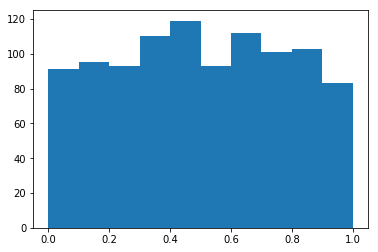

In [157]:
plt.hist(pvalues)

In [158]:
?scipy.stats.gamma.pdf

Object `scipy.stats.gamma.pdf` not found.


In [173]:
def plot_null_gamma():
    x = np.linspace(0, 10, 5000)
    y = gamma.pdf(x, 1,0,1)
    plt.plot(x, y)
    
def plot_alt_gamma(fit_alpha, fit_loc, fit_beta):
    x = np.linspace(0, 10, 5000)
    y = gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
    plt.plot(x, y)

In [172]:
?gamma.pdf

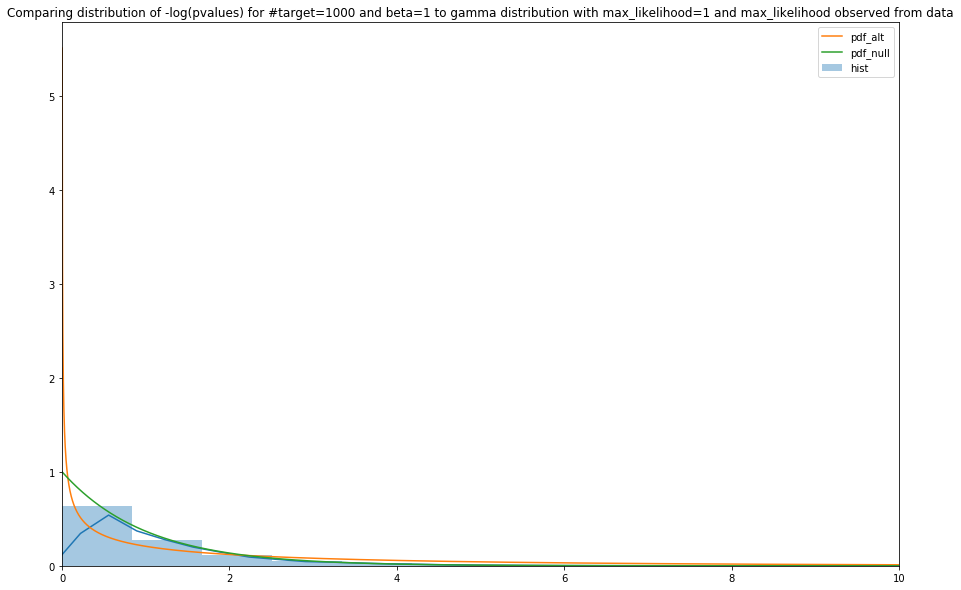

In [175]:
data = pd.read_csv('/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_1000/Beta_1/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')

plt.figure(figsize=[15, 10])
pvalues = -np.log(list(data['p-value']))
# pvalues = (list(data['p-value']))

fit_alpha, fit_loc, fit_beta=stats.gamma.fit(pvalues, floc=0)

sns.distplot(pvalues, kde=True)
plot_alt_gamma(fit_alpha, fit_loc, fit_beta)
plot_null_gamma()
plt.xlim((0, 10))
plt.legend([f'pdf_alt', f'pdf_null', 'hist'])
plt.title('Comparing distribution of -log(pvalues) for #target=1000 and beta=1 to gamma distribution with max_likelihood=1 and max_likelihood observed from data')

pass

In [176]:
def log_likelihood_neg_gamma(t, k, theta, pvals):
    gamma_pdf = (pvals**(k-1)*np.exp(-pvals/theta))/((theta**k)*gamma(k))
    return -np.sum(np.log((1-t) * np.exp(-pvals) + t * gamma_pdf))


In [180]:
r = gamma.rvs(a=1, loc=0, scale=1, size=1000)

In [181]:
r

array([5.09936767e-01, 6.88489769e-01, 1.76209857e-01, 1.66060353e-01,
       7.18515103e-01, 6.88247149e-01, 1.58399257e+00, 3.50937235e-01,
       6.48621727e-01, 1.25177663e-01, 1.29630481e+00, 2.32032319e-01,
       4.63069588e-01, 5.54535538e+00, 4.31953204e-01, 9.42291996e-01,
       1.94288380e+00, 9.48767581e-01, 1.93513468e-01, 9.00774436e-03,
       2.06757000e-01, 1.46534237e+00, 7.30883123e-01, 9.86273888e-02,
       1.03467738e+00, 4.24939566e-01, 1.75196933e-01, 9.54081864e-01,
       7.76223010e-03, 2.51106714e-01, 5.18214003e-01, 1.11234365e+00,
       7.15653360e-01, 1.12900896e+00, 4.62588424e-01, 8.38465247e-01,
       4.86535838e+00, 2.54085685e-01, 9.75884695e-02, 3.65533293e-01,
       2.02243900e+00, 2.27420769e-01, 4.53277927e-01, 6.73104832e-01,
       1.40372005e-01, 2.15335532e+00, 8.65885542e-01, 2.30068486e+00,
       4.25100203e-01, 1.14806917e-01, 5.61695258e-01, 7.70907629e-01,
       8.18949947e-01, 1.13653682e-01, 2.04400614e+00, 1.45441120e+00,
      

In [182]:
    fit_alpha, fit_loc, fit_beta=stats.gamma.fit(r, floc=0)
    alt_lklh = stats.gamma.logpdf(s, fit_alpha, fit_loc, fit_beta).sum()
    null_lklh = stats.gamma.logpdf(s, 1,0,1).sum()

In [183]:
alt_lklh

-988.6769156224177

In [184]:
null_lklh

-988.2324037900195

In [185]:
fit_alpha, fit_loc, fit_beta

(0.9639140415449088, 0, 1.0279183648437433)

In [186]:
r = gamma.rvs(a=3, loc=0, scale=3, size=1000)

In [191]:
    fit_alpha, fit_loc, fit_beta=stats.gamma.fit(r, floc=0)
    alt_lklh = stats.gamma.logpdf(r, fit_alpha, fit_loc, fit_beta).sum()
    null_lklh = stats.gamma.logpdf(r, 1,0,1).sum()

In [188]:
fit_alpha, fit_loc, fit_beta

(2.994200624651716, 0, 2.9293308922187586)

In [192]:
alt_lklh

-2921.1324489377416

In [193]:
null_lklh

-8771.004387292976

In [195]:
log_likelihood_neg_gamma(1, fit_alpha, fit_beta, r)

TypeError: unsupported operand type(s) for *: 'float' and 'rv_frozen'

In [415]:
from scipy.stats import gamma as gamma_func
from scipy.special import gamma, factorial

def log_likelihood_neg_gamma(t, k, theta, pvals):
    gamma_pdf_scipy = gamma_func.pdf(pvals, k, 0, theta)
    #gamma_pdf = (pvals**(k-1)*np.exp(-pvals/theta))/((theta**k)*gamma(k))
    return -np.sum(np.log((1-t) * np.exp(-pvals) + t * gamma_pdf_scipy))

def likelihood_ratio_test(pvals, true_t=0, true_k=1, true_theta=1, df=3):
    null_lklh = log_likelihood_neg_gamma(true_t, true_k, true_theta, pvals)
#     print(null_lklh)
    alt_lklh = scipy.optimize.minimize(lambda tktheta: log_likelihood_neg_gamma(*tktheta, pvals=pvals),
                                       method='L-BFGS-B',
                                       x0=(0.5, 1, 1),
                                       bounds=(
                                           (10**(-5), 1-10**(-5)),
                                           (10**(-5), None),
                                           (10**(-5), None)
                                       )
                                       )
    alt_lklh = alt_lklh['fun']
#     print(alt_lklh)
    test_stat = -2*(-null_lklh + alt_lklh)

    pvalue = 1 - scipy.stats.chi2.cdf(test_stat, df)
#     print(pvalue)
    return pvalue

In [208]:
#df=3
pvalues = []
for i in range(1000):
    s = -np.log(np.random.uniform(0, 1, 1000))
    pvalue = likelihood_ratio_test(s)
 
    pvalues.append(pvalue)

(array([108.,  85.,  73.,  75.,  71.,  81.,  93.,  84., 116., 214.]),
 array([2.62272396e-04, 1.00235257e-01, 2.00208242e-01, 3.00181227e-01,
        4.00154211e-01, 5.00127196e-01, 6.00100181e-01, 7.00073166e-01,
        8.00046150e-01, 9.00019135e-01, 9.99992120e-01]),
 <a list of 10 Patch objects>)

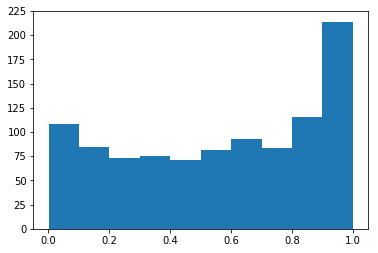

In [209]:
plt.hist(pvalues)

In [202]:
pvalues = []
for i in range(1000):
    s = -np.log(np.random.uniform(0, 1, 1000))
    pvalue = likelihood_ratio_test(s)
 
    pvalues.append(pvalue)

(array([ 95.,  96.,  67.,  84.,  87.,  78.,  96.,  95., 107., 195.]),
 array([2.63304365e-05, 1.00016999e-01, 2.00007667e-01, 2.99998336e-01,
        3.99989004e-01, 4.99979673e-01, 5.99970341e-01, 6.99961010e-01,
        7.99951678e-01, 8.99942347e-01, 9.99933015e-01]),
 <a list of 10 Patch objects>)

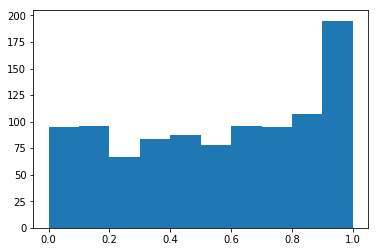

In [203]:
plt.hist(pvalues)

In [205]:
pvalues = []
for i in range(1000):
    s = -np.log(np.random.uniform(0, 1, 1000))
    pvalue = likelihood_ratio_test(s)
 
    pvalues.append(pvalue)

(array([175., 132., 110., 102.,  89.,  89.,  67.,  73.,  68.,  95.]),
 array([2.78133839e-04, 1.00084735e-01, 1.99891336e-01, 2.99697937e-01,
        3.99504537e-01, 4.99311138e-01, 5.99117739e-01, 6.98924340e-01,
        7.98730941e-01, 8.98537542e-01, 9.98344143e-01]),
 <a list of 10 Patch objects>)

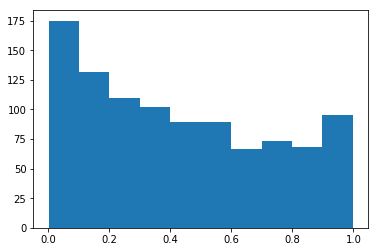

In [206]:
plt.hist(pvalues)

In [211]:
# df=2
pvalues = []
for i in range(1000):
    s = -np.log(np.random.uniform(0, 1, 1000))
    pvalue = likelihood_ratio_test(s)
 
    pvalues.append(pvalue)

(array([169., 127., 103.,  96.,  86.,  97.,  81.,  77.,  73.,  91.]),
 array([6.66752252e-04, 1.00544599e-01, 2.00422446e-01, 3.00300292e-01,
        4.00178139e-01, 5.00055986e-01, 5.99933832e-01, 6.99811679e-01,
        7.99689526e-01, 8.99567372e-01, 9.99445219e-01]),
 <a list of 10 Patch objects>)

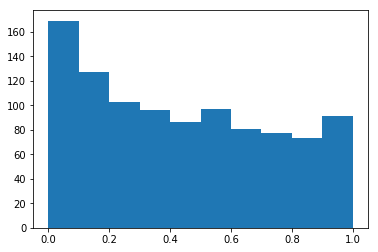

In [212]:
plt.hist(pvalues)

In [245]:
def SimulatePvals(G, T, k, theta):
    # Simulate log pvalues
    pvals = []
    
    n_latent = np.random.binomial(n=G, p=T)
    pvals_latent = np.random.gamma(k, scale=theta, size=n_latent)
    pvals_non_latent = np.random.exponential(1, size=G-n_latent)
    pvals = np.concatenate((pvals_latent, pvals_non_latent))
    np.random.shuffle(pvals)
    return pvals

In [256]:
# df=3
pvalues = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    pvalue = likelihood_ratio_test(s, true_k=1, true_theta=10, true_t=0, df=3)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
    pvalues.append(pvalue)

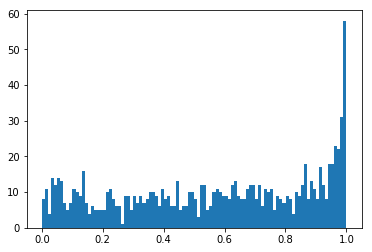

In [257]:
plt.hist(pvalues, bins=100)
pass

In [259]:
# df=3
pvalues = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    pvalue = likelihood_ratio_test(s, true_k=1, true_theta=10, true_t=0, df=3)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
    pvalues.append(pvalue)

Text(0, 0.5, 'count')

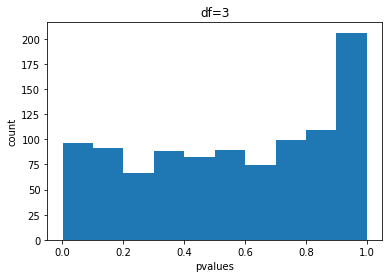

In [261]:
plt.hist(pvalues)
plt.title('df=3')
plt.xlabel('pvalues')
plt.ylabel('count')

In [262]:
# df=2
pvalues = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    pvalue = likelihood_ratio_test(s, true_k=1, true_theta=10, true_t=0, df=2)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
    pvalues.append(pvalue)

Text(0, 0.5, 'count')

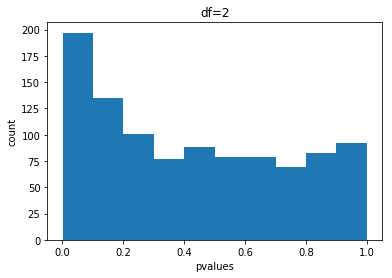

In [263]:
plt.hist(pvalues)
plt.title('df=2')
plt.xlabel('pvalues')
plt.ylabel('count')

In [264]:
# df=2.5
pvalues = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    pvalue = likelihood_ratio_test(s, true_k=1, true_theta=10, true_t=0, df=2.5)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
    pvalues.append(pvalue)



Text(0, 0.5, 'count')

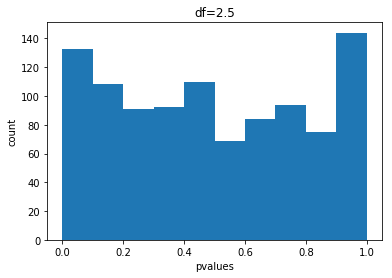

In [265]:
plt.hist(pvalues)
plt.title('df=2.5')
plt.xlabel('pvalues')
plt.ylabel('count')

In [266]:
# df=2.5\3
pvalues = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    pvalue = likelihood_ratio_test(s, true_k=1, true_theta=10, true_t=0, df=2.3)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
    pvalues.append(pvalue)



Text(0, 0.5, 'count')

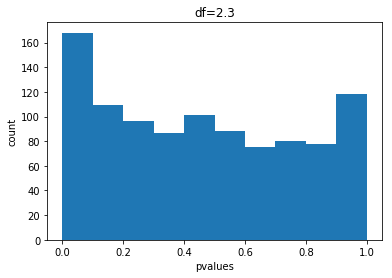

In [267]:
plt.hist(pvalues)
plt.title('df=2.3')
plt.xlabel('pvalues')
plt.ylabel('count')

In [382]:
from scipy.stats import gamma as gamma_func
from scipy.special import gamma, factorial

def log_likelihood_neg_gamma(t, k, theta, pvals):
    gamma_pdf_scipy = gamma_func.pdf(pvals, k, 0, theta)
    #gamma_pdf = (pvals**(k-1)*np.exp(-pvals/theta))/((theta**k)*gamma(k))
    return -np.sum(np.log((1-t) * np.exp(-pvals) + t * gamma_pdf_scipy))

def likelihood_ratio_test_50perc(pvals, true_t=0, true_k=1, true_theta=1, df=3):
    null_lklh = log_likelihood_neg_gamma(true_t, true_k, true_theta, pvals)
#     print(null_lklh)
    alt_lklh = scipy.optimize.minimize(lambda tktheta: log_likelihood_neg_gamma(*tktheta, pvals=pvals),
                                       method='L-BFGS-B',
                                       x0=(0.5, 1, 1),
                                       bounds=(
                                           (0, 1-10**(-5)),
                                           (10**(-5), None),
                                           (10**(-5), None)
                                       )
                                       )
    # border_lklh = log_likelihood_neg_gamma(0, 1, 1, pvals=pvals)
    # if border_lklh < alt_lklh['fun']:
    #     alt_lklh = border_lklh
    # else:
    #     alt_lklh = alt_lklh['fun']

    alt_lklh = alt_lklh['fun']
    assert null_lklh > alt_lklh

    #     print(alt_lklh)
    test_stat = -2*(-null_lklh + alt_lklh)

    pvalue = 0.5*SF(test_stat) + 0.5*scipy.stats.chi2.sf(test_stat, df)
#     pvalue = 1 - scipy.stats.chi2.cdf(test_stat, df)
#     print(pvalue)
    return test_stat, pvalue

def SF(x):
    if x > 0:
        return 0
    if x <= 0:
        return 1
    
# def likelihood_ratio_test_50perc(pvals, true_t=0, true_k=1, true_theta=1, df=3):
    
#         likelihood = 1/(np.mean(np.negative(np.log(pvalues[i][1:]))))
#         #print(likelihood)
#         value = -2 * ((((likelihood - 1) * num_genes)/likelihood) - num_genes*np.log(likelihood))

In [281]:

pvalues = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    pvalue = likelihood_ratio_test_50perc(s, true_k=1, true_theta=10, true_t=0, df=1)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
    pvalues.append(pvalue)



Text(0, 0.5, 'count')

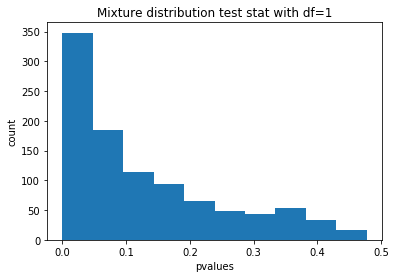

In [282]:
plt.hist(pvalues)
plt.title('Mixture distribution test stat with df=1')
plt.xlabel('pvalues')
plt.ylabel('count')

In [283]:

pvalues = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    pvalue = likelihood_ratio_test_50perc(s, true_k=1, true_theta=10, true_t=0, df=2)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
    pvalues.append(pvalue)



Text(0, 0.5, 'count')

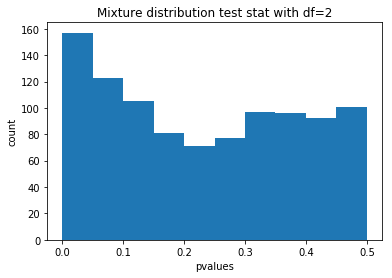

In [284]:
plt.hist(pvalues)
plt.title('Mixture distribution test stat with df=2')
plt.xlabel('pvalues')
plt.ylabel('count')

In [285]:

pvalues = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    pvalue = likelihood_ratio_test_50perc(s, true_k=1, true_theta=10, true_t=0, df=3)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
    pvalues.append(pvalue)



Text(0, 0.5, 'count')

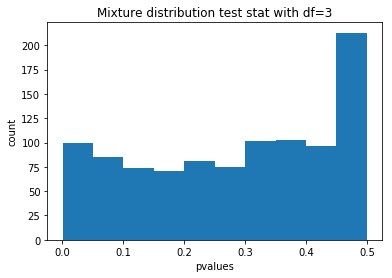

In [286]:
plt.hist(pvalues)
plt.title('Mixture distribution test stat with df=3')
plt.xlabel('pvalues')
plt.ylabel('count')

In [287]:

pvalues = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    pvalue = likelihood_ratio_test_50perc(s, true_k=1, true_theta=10, true_t=0, df=2.5)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
    pvalues.append(pvalue)



Text(0, 0.5, 'count')

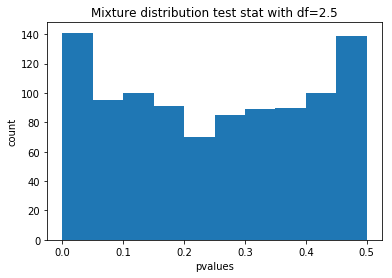

In [288]:
plt.hist(pvalues)
plt.title('Mixture distribution test stat with df=2.5')
plt.xlabel('pvalues')
plt.ylabel('count')

In [383]:

pvalues = []
test_stats = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    test_stat, pvalue = likelihood_ratio_test_50perc(s, true_k=1, true_theta=10, true_t=0, df=3)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
    pvalues.append(pvalue)
    test_stats.append(test_stat)



In [384]:
Counter(test_stats).most_common(10)

[(0.0867354365987012, 1),
 (0.2129504150068442, 1),
 (1.7514120731311777, 1),
 (2.7884638103359976, 1),
 (1.9300921441167702, 1),
 (3.675193736773963, 1),
 (2.4245854568930554, 1),
 (0.6787661947535071, 1),
 (8.110517398740967, 1),
 (0.8498605174106615, 1)]

In [374]:
all(i >= 0 for i in test_stats)

True

In [294]:
sum(i >= 0.05 for i in test_stats)

979

In [366]:
Counter(test_stats).most_common(10)

[(7.009641775300679, 1),
 (3.9666924545892925, 1),
 (0.4077357206463148, 1),
 (6.462906150222352, 1),
 (0.08190734955860535, 1),
 (1.1723995585782632, 1),
 (4.509008224353693, 1),
 (1.3669124127404757, 1),
 (1.0679725967563627, 1),
 (0.8440465028074868, 1)]

(array([502., 254., 149.,  53.,  19.,  16.,   4.,   2.,   0.,   1.]),
 array([2.59876271e-04, 1.98214668e+00, 3.96403348e+00, 5.94592029e+00,
        7.92780709e+00, 9.90969390e+00, 1.18915807e+01, 1.38734675e+01,
        1.58553543e+01, 1.78372411e+01, 1.98191279e+01]),
 <a list of 10 Patch objects>)

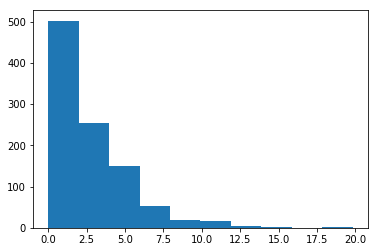

In [295]:
plt.hist(test_stats)


In [339]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_866Indiv_chr1_vcftools_filtered_snps_inter.table', sep='\t')

In [340]:
data

,chrom_start,GTEX.1M4P7,GTEX.1K2DU,GTEX.1B8SF,GTEX.13O3Q,GTEX.13OW8,GTEX.1ICLZ,GTEX.1C475,GTEX.12696,GTEX.Y8DK,...,GTEX.12584,GTEX.1GTWX,GTEX.XMD1,GTEX.1399R,GTEX.ZDYS,GTEX.1JMQK,GTEX.PW2O,GTEX.OXRK,GTEX.WHSB,GTEX.1GF9V
0,chr1_924533,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,chr1_942934,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2,chr1_942951,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,chr1_943937,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,chr1_944101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7563,chr1_248847655,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7564,chr1_248847970,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7565,chr1_248855917,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7566,chr1_248916897,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [349]:
data.iloc[0].value_counts()[1]

13

In [348]:
data.iloc[0].value_counts()

2              414
-1              18
1               13
0                3
chr1_924533      1
Name: 0, dtype: int64

In [385]:
from collections import Counter

discard = []
for index, row in data.iterrows():
    genotypes = list(row[1:])
    # get the minor allele count by taking top 2 of the counts of unique genotypes, least
    mac = Counter(genotypes).most_common(2)[-1][1]
    if mac < 2:
        discard.append(index)

In [364]:
mac

18

In [387]:
len(discard)

359

In [391]:
data.index[discard]

Int64Index([  65,  115,  125,  161,  173,  175,  231,  299,  302,  308,
            ...
            7484, 7490, 7491, 7492, 7503, 7504, 7517, 7548, 7549, 7563],
           dtype='int64', length=359)

In [396]:
data[:66]

,chrom_start,GTEX.1M4P7,GTEX.1K2DU,GTEX.1B8SF,GTEX.13O3Q,GTEX.13OW8,GTEX.1ICLZ,GTEX.1C475,GTEX.12696,GTEX.Y8DK,...,GTEX.12584,GTEX.1GTWX,GTEX.XMD1,GTEX.1399R,GTEX.ZDYS,GTEX.1JMQK,GTEX.PW2O,GTEX.OXRK,GTEX.WHSB,GTEX.1GF9V
0,chr1_924533,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,chr1_942934,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2,chr1_942951,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,chr1_943937,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,chr1_944101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,chr1_1085966,1,1,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
62,chr1_1091327,0,1,2,1,1,0,2,2,2,...,1,0,2,0,1,1,2,1,2,0
63,chr1_1091533,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
64,chr1_1179288,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [399]:
data_mac = data.drop(data.index[discard])

In [400]:
data_mac

,chrom_start,GTEX.1M4P7,GTEX.1K2DU,GTEX.1B8SF,GTEX.13O3Q,GTEX.13OW8,GTEX.1ICLZ,GTEX.1C475,GTEX.12696,GTEX.Y8DK,...,GTEX.12584,GTEX.1GTWX,GTEX.XMD1,GTEX.1399R,GTEX.ZDYS,GTEX.1JMQK,GTEX.PW2O,GTEX.OXRK,GTEX.WHSB,GTEX.1GF9V
0,chr1_924533,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,chr1_942934,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2,chr1_942951,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,chr1_943937,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,chr1_944101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7562,chr1_248847583,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7564,chr1_248847970,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7565,chr1_248855917,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7566,chr1_248916897,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [398]:
data

,chrom_start,GTEX.1M4P7,GTEX.1K2DU,GTEX.1B8SF,GTEX.13O3Q,GTEX.13OW8,GTEX.1ICLZ,GTEX.1C475,GTEX.12696,GTEX.Y8DK,...,GTEX.12584,GTEX.1GTWX,GTEX.XMD1,GTEX.1399R,GTEX.ZDYS,GTEX.1JMQK,GTEX.PW2O,GTEX.OXRK,GTEX.WHSB,GTEX.1GF9V
0,chr1_924533,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,chr1_942934,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
2,chr1_942951,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,chr1_943937,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,chr1_944101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7563,chr1_248847655,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7564,chr1_248847970,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7565,chr1_248855917,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7566,chr1_248916897,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
list(data.iloc[7567])

['chr1_248917151',
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

## Simulating null distribution of mixture model of gamma and exponential

In [404]:
from scipy.stats import gamma as gamma_func
from scipy.special import gamma, factorial

def SimulatePvals(G, T, k, theta):
    # Simulate log pvalues
    pvals = []
    
    n_latent = np.random.binomial(n=G, p=T)
    pvals_latent = np.random.gamma(k, scale=theta, size=n_latent)
    pvals_non_latent = np.random.exponential(1, size=G-n_latent)
    pvals = np.concatenate((pvals_latent, pvals_non_latent))
    np.random.shuffle(pvals)
    return pvals

def log_likelihood_neg_gamma(t, k, theta, pvals):
    gamma_pdf_scipy = gamma_func.pdf(pvals, k, 0, theta)
    #gamma_pdf = (pvals**(k-1)*np.exp(-pvals/theta))/((theta**k)*gamma(k))
    return -np.sum(np.log((1-t) * np.exp(-pvals) + t * gamma_pdf_scipy))

def likelihood_ratio_test_50perc(pvals, true_t=0, true_k=1, true_theta=1, df=3):
    null_lklh = log_likelihood_neg_gamma(true_t, true_k, true_theta, pvals)
#     print(null_lklh)
    alt_lklh = scipy.optimize.minimize(lambda tktheta: log_likelihood_neg_gamma(*tktheta, pvals=pvals),
                                       method='L-BFGS-B',
                                       x0=(0.5, 1, 1),
                                       bounds=(
                                           (0, 1-10**(-5)),
                                           (10**(-5), None),
                                           (10**(-5), None)
                                       )
                                       )
    # border_lklh = log_likelihood_neg_gamma(0, 1, 1, pvals=pvals)
    # if border_lklh < alt_lklh['fun']:
    #     alt_lklh = border_lklh
    # else:
    #     alt_lklh = alt_lklh['fun']

    alt_lklh = alt_lklh['fun']
#     assert null_lklh > alt_lklh

    #     print(alt_lklh)
    test_stat = -2*(-null_lklh + alt_lklh)

#     pvalue = 0.5*SF(test_stat) + 0.5*scipy.stats.chi2.sf(test_stat, df)
#     pvalue = 1 - scipy.stats.chi2.cdf(test_stat, df)
#     print(pvalue)
    return test_stat

def SF(x):
    if x > 0:
        return 0
    if x <= 0:
        return 1
    
# def likelihood_ratio_test_50perc(pvals, true_t=0, true_k=1, true_theta=1, df=3):
    
#         likelihood = 1/(np.mean(np.negative(np.log(pvalues[i][1:]))))
#         #print(likelihood)
#         value = -2 * ((((likelihood - 1) * num_genes)/likelihood) - num_genes*np.log(likelihood))

In [408]:

# pvalues = []
null_test_stats = []
for i in range(10000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    test_stat = likelihood_ratio_test_50perc(s, true_k=1, true_theta=10, true_t=0, df=3)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
#     pvalues.append(pvalue)
    null_test_stats.append(test_stat)



In [425]:
null_test_stats[0]

-4.695666038474428

In [427]:
np.savetxt('/storage/cynthiawu/trans_eQTL/Scripts/gammaModel/null_teststats_gamma', null_test_stats, delimiter='\t')

(array([1.000e+00, 3.225e+03, 4.445e+03, 1.548e+03, 5.330e+02, 1.780e+02,
        5.100e+01, 1.300e+01, 4.000e+00, 2.000e+00]),
 array([-4.69566604, -1.81965917,  1.0563477 ,  3.93235457,  6.80836144,
         9.68436831, 12.56037519, 15.43638206, 18.31238893, 21.1883958 ,
        24.06440267]),
 <a list of 10 Patch objects>)

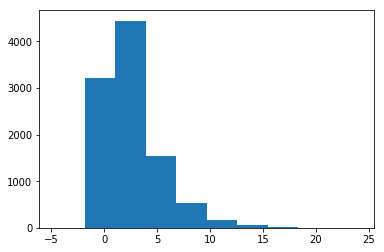

In [424]:
plt.hist(null_test_stats)

In [428]:
scipy.stats.kstest(null_test_stats, 'uniform')

KstestResult(statistic=0.6901372905026575, pvalue=0.0)

(array([490., 232., 131.,  83.,  36.,  15.,   6.,   4.,   1.,   2.]),
 array([4.89772064e-04, 1.83901505e+00, 3.67754033e+00, 5.51606561e+00,
        7.35459089e+00, 9.19311617e+00, 1.10316415e+01, 1.28701667e+01,
        1.47086920e+01, 1.65472173e+01, 1.83857426e+01]),
 <a list of 10 Patch objects>)

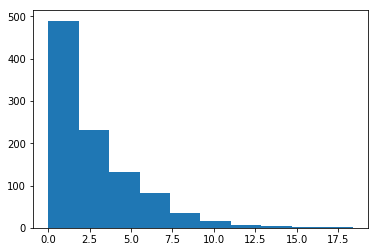

In [407]:
plt.hist(test_stats)

In [409]:
def calculate_empirical(null_test_stats, observed_test_stats):
    #sim_zscores = np.loadtxt('/storage/cynthiawu/trans_eQTL/Nerve-Tibial/chr1_gene_snp_eqtls_simzscores100.csv', delimiter='\t')
    null_test_stats.sort()
    #obs_cpma = pd.read_csv('/storage/cynthiawu/trans_eQTL/Nerve-Tibial/chr1_gene_snp_eqtls_cpma_nofdr.csv', sep='\t')
    n_iter = len(null_test_stats)
    pvalue = []
    for obs in observed_test_stats:
        index = n_iter - np.searchsorted(null_test_stats, obs)
        pvalue.append((index + 1)/(n_iter+1))
    return pvalue

In [410]:

# pvalues = []
observed_test_stats = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    test_stat = likelihood_ratio_test_50perc(s, true_k=1, true_theta=10, true_t=0, df=3)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
#     pvalues.append(pvalue)
    observed_test_stats.append(test_stat)



In [411]:
pvalues = calculate_empirical(null_test_stats, observed_test_stats)

In [412]:
pvalues

[0.6484351564843516,
 0.40955904409559046,
 0.43655634436556345,
 0.36276372362763726,
 0.9224077592240776,
 0.5326467353264673,
 0.9371062893710629,
 0.634936506349365,
 0.6821317868213179,
 0.15028497150284972,
 0.43855614438556145,
 0.0091990800919908,
 0.17218278172182783,
 0.13358664133586642,
 0.286971302869713,
 0.0670932906709329,
 0.9956004399560044,
 0.7161283871612839,
 0.5429457054294571,
 0.8653134686531346,
 0.6613338666133387,
 0.2615738426157384,
 0.039896010398960104,
 0.6688331166883311,
 0.19368063193680632,
 0.6344365563443656,
 0.7758224177582241,
 0.8814118588141185,
 0.24577542245775422,
 0.27947205279472054,
 0.7199280071992801,
 0.6179382061793821,
 0.24857514248575144,
 0.5072492750724927,
 0.8785121487851215,
 0.8177182281771823,
 0.9039096090390961,
 0.13928607139286073,
 0.1262873712628737,
 0.6197380261973803,
 0.7048295170482952,
 0.6962303769623037,
 0.8746125387461254,
 0.9634036596340366,
 0.10318968103189681,
 0.32836716328367166,
 0.5420457954204579,

(array([ 89.,  99., 100.,  87.,  88., 120., 110., 112.,  94., 101.]),
 array([6.99930007e-04, 1.00579942e-01, 2.00459954e-01, 3.00339966e-01,
        4.00219978e-01, 5.00099990e-01, 5.99980002e-01, 6.99860014e-01,
        7.99740026e-01, 8.99620038e-01, 9.99500050e-01]),
 <a list of 10 Patch objects>)

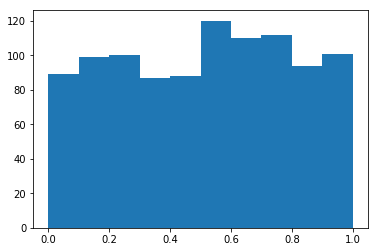

In [413]:
plt.hist(pvalues)

In [414]:
scipy.stats.kstest(pvalues, 'uniform')

KstestResult(statistic=0.04205069493050695, pvalue=0.056584216856555264)

In [418]:

# pvalues = []
observed_test_stats2 = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    test_stat = likelihood_ratio_test_50perc(s, true_k=1, true_theta=10, true_t=0, df=3)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
#     pvalues.append(pvalue)
    observed_test_stats2.append(test_stat)



In [419]:
pvalues2 = calculate_empirical(null_test_stats, observed_test_stats2)

(array([109.,  93., 104., 104.,  96.,  97.,  98.,  91., 107., 101.]),
 array([2.99970003e-04, 1.00259974e-01, 2.00219978e-01, 3.00179982e-01,
        4.00139986e-01, 5.00099990e-01, 6.00059994e-01, 7.00019998e-01,
        7.99980002e-01, 8.99940006e-01, 9.99900010e-01]),
 <a list of 10 Patch objects>)

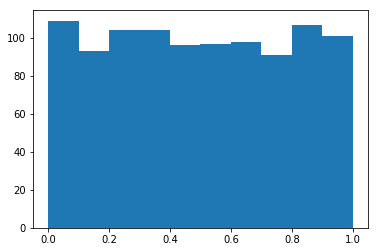

In [421]:
plt.hist(pvalues2)

In [420]:
scipy.stats.kstest(pvalues2, 'uniform')

KstestResult(statistic=0.021206079392060796, pvalue=0.7594604694961778)

In [416]:
# df=3
pvalues_df3 = []
for i in range(1000):
    s = SimulatePvals(G=1000, T=0, k=1, theta=10)
    pvalue = likelihood_ratio_test(s, true_k=1, true_theta=10, true_t=0, df=3)
#     print(pvalue)
#     if pvalue == 1.0:
#         break
 
    pvalues_df3.append(pvalue)

In [417]:
scipy.stats.kstest(pvalues_df3, 'uniform')

KstestResult(statistic=0.10689604949525189, pvalue=2.0973540430053328e-10)

In [447]:
path = '/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_0/Beta_0'

mixture_test_stats = []
pvalues = []
for i in range(100):
    fname = f'{path}/Simulation_{i}/gammaModel/gene-snp-eqtl_gammateststat'
    data = pd.read_csv(fname, sep='\t')
    mixture_test_stats.append(float(data['mixture_test_stats']))
    pvalues.append(float(data['pvalue']))

In [444]:
data

,snp,mixture_test_stats,pvalue
0,SNP0,8.167704,0.044096


(array([51., 34.,  7.,  2.,  1.,  3.,  0.,  1.,  0.,  1.]),
 array([ 0.02511581,  1.60259013,  3.18006445,  4.75753877,  6.33501309,
         7.91248741,  9.48996173, 11.06743604, 12.64491036, 14.22238468,
        15.799859  ]),
 <a list of 10 Patch objects>)

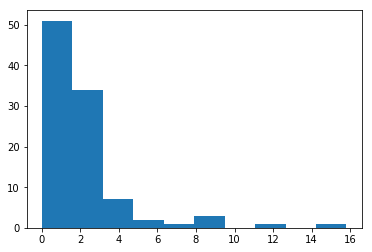

In [448]:
plt.hist(mixture_test_stats)

(array([ 6.,  2.,  6., 11., 14., 11., 13., 14., 13., 10.]),
 array([0.0019998 , 0.10044996, 0.19890011, 0.29735026, 0.39580042,
        0.49425057, 0.59270073, 0.69115088, 0.78960104, 0.88805119,
        0.98650135]),
 <a list of 10 Patch objects>)

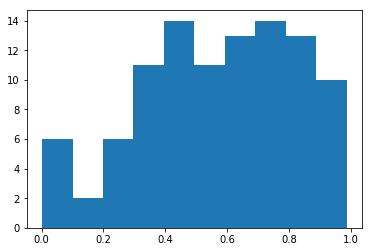

In [446]:
plt.hist(pvalues)

In [449]:
path = '/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_0'

mixture_test_stats = []
pvalues = []
for beta in ['Beta_001', 'Beta_002', 'Beta_003', 'Beta_004', 'Beta_005', 'Beta_01', 'Beta_02', 'Beta_03', 'Beta_04', 'Beta_05']:
    path_beta = f'{path}/{beta}'
    for i in range(100):
        fname = f'{path_beta}/Simulation_{i}/gammaModel/gene-snp-eqtl_gammateststat'
        data = pd.read_csv(fname, sep='\t')
        mixture_test_stats.append(float(data['mixture_test_stats']))
        pvalues.append(float(data['pvalue']))

In [451]:
len(mixture_test_stats)

1000

In [452]:
mixture_test_stats

[1.3857238933815097,
 15.799859000933793,
 0.7853930342025706,
 0.6393634476298757,
 1.0212249337419053,
 6.479321691658697,
 0.8246793398211594,
 4.969360299073742,
 1.8136693344640664,
 2.448870021824405,
 2.5173497560826945,
 3.8561948232891154,
 0.3867335362119775,
 1.6316966133672397,
 1.046246856221842,
 2.485933995791129,
 2.0515385684775542,
 1.362522308867483,
 1.2094105935830155,
 0.3453127329121344,
 0.4562250998205855,
 0.4846721614921989,
 1.1176972729408592,
 1.0287299457777408,
 2.307028301260289,
 2.3648527119548817,
 0.6301313871335879,
 0.6406723609725304,
 2.7592596922841044,
 0.2428131129054236,
 0.08768530933230068,
 2.741565787746368,
 1.0922752410260728,
 0.9779499899414076,
 2.453201151009125,
 1.0635863306997635,
 3.5284224134557007,
 1.3432163380639397,
 2.1291416770291107,
 2.6544116466611736,
 0.14851870555139612,
 1.5117848650697852,
 0.7328654451157491,
 3.0385851783212274,
 0.18108378643955805,
 3.45772977516026,
 1.6487612586133764,
 2.422329377419373,
 

In [454]:
targets = [ 0, 5, 10, 15, 20, 30, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500, 700, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
path = '/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter'

mixture_test_stats = []
pvalues = []
for tar in targets:  
    path_tar = f'{path}/numTarget_{tar}/Beta_0'
    for i in range(100):
        fname = f'{path_beta}/Simulation_{i}/gammaModel/gene-snp-eqtl_gammateststat'
        data = pd.read_csv(fname, sep='\t')
        mixture_test_stats.append(float(data['mixture_test_stats']))
        pvalues.append(float(data['pvalue'])) 


In [457]:
np.savetxt('/storage/cynthiawu/trans_eQTL/Scripts/gammaModel/null_teststats_gamma_data', mixture_test_stats, delimiter='\t')

(array([1734., 1156.,  238.,   68.,   34.,  102.,    0.,   34.,    0.,
          34.]),
 array([ 0.02511581,  1.60259013,  3.18006445,  4.75753877,  6.33501309,
         7.91248741,  9.48996173, 11.06743604, 12.64491036, 14.22238468,
        15.799859  ]),
 <a list of 10 Patch objects>)

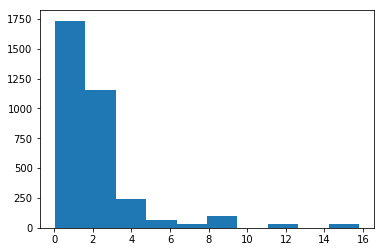

In [456]:
plt.hist(mixture_test_stats)

In [475]:
path = '/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_0/Beta_01'

mixture_test_stats = []
pvalues = []
for i in range(100):
    fname = f'{path}/Simulation_{i}/gammaModel/gene-snp-eqtl_gamma_empiricalteststat'
    data = pd.read_csv(fname, sep='\t')
    mixture_test_stats.append(float(data['mixture_test_stats']))
    pvalues.append(float(data['empirical_pvalue']))

(array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]),
 array([0.01029109, 0.10926198, 0.20823287, 0.30720376, 0.40617465,
        0.50514555, 0.60411644, 0.70308733, 0.80205822, 0.90102911,
        1.        ]),
 <a list of 10 Patch objects>)

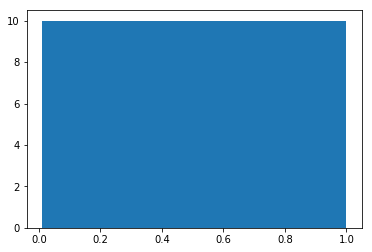

In [460]:
plt.hist(pvalues)

In [461]:
len(pvalues)

100

In [463]:
sum(i <= 0.05 for i in pvalues)

4

In [474]:
path = '/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_0/Beta_1'

mixture_test_stats2 = []
pvalues2 = []
for i in range(100):
    fname = f'{path}/Simulation_{i}/gammaModel/gene-snp-eqtl_gamma_empiricalteststat'
    data = pd.read_csv(fname, sep='\t')
    mixture_test_stats2.append(float(data['mixture_test_stats']))
    pvalues2.append(float(data['empirical_pvalue']))

(array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]),
 array([0.01029109, 0.10926198, 0.20823287, 0.30720376, 0.40617465,
        0.50514555, 0.60411644, 0.70308733, 0.80205822, 0.90102911,
        1.        ]),
 <a list of 10 Patch objects>)

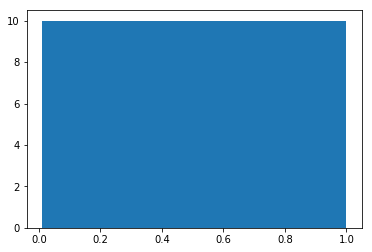

In [472]:
plt.hist(pvalues2)

In [469]:
sum(i <= 0.05 for i in pvalues)

4

In [473]:
set(pvalues) == set(pvalues2)


True

In [476]:
set(mixture_test_stats) == set(mixture_test_stats2)


True

In [478]:
pvalues.sort()

In [479]:
pvalues

[0.0102910908556307,
 0.020288150543957655,
 0.030285210232284625,
 0.04028226992061158,
 0.05027932960893855,
 0.06027638929726551,
 0.07027344898559247,
 0.08027050867391944,
 0.0902675683622464,
 0.10026462805057336,
 0.11026168773890033,
 0.12025874742722728,
 0.13025580711555426,
 0.14025286680388122,
 0.15024992649220814,
 0.16024698618053515,
 0.1702440458688621,
 0.18024110555718906,
 0.19023816524551604,
 0.20023522493384302,
 0.21023228462216995,
 0.2202293443104969,
 0.2302264039988239,
 0.24022346368715086,
 0.2502205233754778,
 0.2602175830638048,
 0.2702146427521317,
 0.2802117024404587,
 0.2902087621287857,
 0.30020582181711264,
 0.3102028815054396,
 0.3201999411937665,
 0.3301970008820935,
 0.34019406057042045,
 0.35019112025874743,
 0.3601881799470744,
 0.3701852396354013,
 0.3801822993237283,
 0.3901793590120553,
 0.40017641870038223,
 0.4101734783887092,
 0.4201705380770362,
 0.4301675977653631,
 0.4401646574536901,
 0.4501617171420171,
 0.46015877683034395,
 0.47015

In [481]:
# targets = [ 0, 5, 10, 15, 20, 30, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500, 700, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
path = '/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/NullCases_numTarget_0'

mixture_test_stats = []
for i in range(1000):
    fname = f'{path}/Simulation_{i}/gammaModel/gene-snp-eqtl_gammateststat'
    data = pd.read_csv(fname, sep='\t')
    mixture_test_stats.append(float(data['mixture_test_stats']))


In [483]:
Counter(mixture_test_stats).most_common(10)

[(1.8956195033933907, 1),
 (7.007109414342268, 1),
 (2.9021589694239083, 1),
 (0.6690748992659792, 1),
 (2.6035116145794746, 1),
 (0.5831725312200433, 1),
 (4.4752979592667534, 1),
 (0.6145867691629974, 1),
 (5.964207908138633, 1),
 (3.205065639849636, 1)]

(array([539., 236., 127.,  48.,  28.,  11.,   5.,   1.,   2.,   3.]),
 array([2.64410389e-03, 1.58086313e+00, 3.15908216e+00, 4.73730119e+00,
        6.31552022e+00, 7.89373925e+00, 9.47195828e+00, 1.10501773e+01,
        1.26283963e+01, 1.42066154e+01, 1.57848344e+01]),
 <a list of 10 Patch objects>)

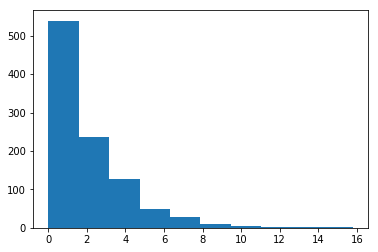

In [482]:
plt.hist(mixture_test_stats)

In [484]:
np.savetxt('/storage/cynthiawu/trans_eQTL/Scripts/gammaModel/null_teststats_gamma_simulated_data', mixture_test_stats, delimiter='\t')

In [498]:
path = '/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_0/Beta_01'

mixture_test_stats = []
pvalues = []
for i in range(100):
    fname = f'{path}/Simulation_{i}/gammaModel/gene-snp-eqtl_gammateststat'
    data = pd.read_csv(fname, sep='\t')
    mixture_test_stats.append(float(data['mixture_test_stats']))
    pvalues.append(float(data['empirical_pvalue']))

(array([ 8.,  6., 12., 14., 11.,  9., 12., 10.,  9.,  9.]),
 array([0.000999  , 0.0997003 , 0.1984016 , 0.2971029 , 0.3958042 ,
        0.49450549, 0.59320679, 0.69190809, 0.79060939, 0.88931069,
        0.98801199]),
 <a list of 10 Patch objects>)

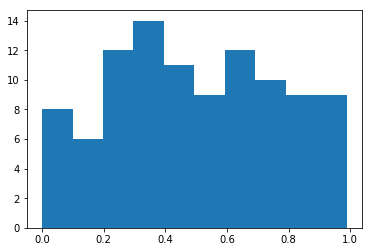

In [487]:
plt.hist(pvalues)

In [499]:
sum(i <= 0.05 for i in pvalues)

6

In [488]:
scipy.stats.kstest(pvalues, 'uniform')

KstestResult(statistic=0.08576423576423575, pvalue=0.43416741878785176)

In [494]:
path = '/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_20/Beta_001'

mixture_test_stats = []
pvalues = []
for i in range(100):
    fname = f'{path}/Simulation_{i}/gammaModel/gene-snp-eqtl_gammateststat'
    data = pd.read_csv(fname, sep='\t')
    mixture_test_stats.append(float(data['mixture_test_stats']))
    pvalues.append(float(data['empirical_pvalue']))

(array([ 8.,  6., 12., 15., 10., 11., 12., 10.,  7.,  9.]),
 array([0.000999  , 0.1000999 , 0.1992008 , 0.2983017 , 0.3974026 ,
        0.4965035 , 0.5956044 , 0.69470529, 0.79380619, 0.89290709,
        0.99200799]),
 <a list of 10 Patch objects>)

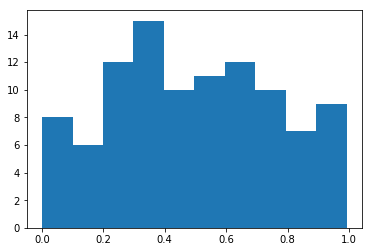

In [495]:
plt.hist(pvalues)

In [496]:
scipy.stats.kstest(pvalues, 'uniform')

KstestResult(statistic=0.0757242757242757, pvalue=0.6046485811516396)

## Sample size=500 Null distribution

In [5]:
# targets = [ 0, 5, 10, 15, 20, 30, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500, 700, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
path = '/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize500/NullCases_numTarget_0'

mixture_test_stats = []
for i in range(1000):
    fname = f'{path}/Simulation_{i}/gammaModel/gene-snp-eqtl_gammateststat'
    data = pd.read_csv(fname, sep='\t')
    mixture_test_stats.append(float(data['mixture_test_stats']))


(array([517., 235., 125.,  54.,  30.,  19.,  15.,   3.,   1.,   1.]),
 array([1.04091944e-03, 1.42470752e+00, 2.84837413e+00, 4.27204073e+00,
        5.69570733e+00, 7.11937394e+00, 8.54304054e+00, 9.96670714e+00,
        1.13903737e+01, 1.28140404e+01, 1.42377070e+01]),
 <a list of 10 Patch objects>)

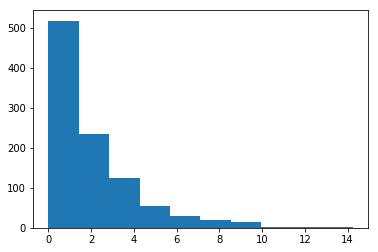

In [6]:
plt.hist(mixture_test_stats)

In [7]:
np.savetxt('/storage/cynthiawu/trans_eQTL/Scripts/gammaModel/null_teststats_gamma_simulated_data_500', mixture_test_stats, delimiter='\t')

In [13]:
path = '/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize500/SingleParameter/numTarget_15/Beta_01'

mixture_test_stats = []
pvalues = []
for i in range(100):
    fname = f'{path}/Simulation_{i}/gammaModel/gene-snp-eqtl_gammateststat'
    data = pd.read_csv(fname, sep='\t')
    mixture_test_stats.append(float(data['mixture_test_stats']))
    pvalues.append(float(data['empirical_pvalue']))

(array([ 4.,  9., 11., 13., 11., 14.,  7., 11.,  8., 12.]),
 array([0.002997  , 0.1020979 , 0.2011988 , 0.3002997 , 0.3994006 ,
        0.4985015 , 0.5976024 , 0.6967033 , 0.7958042 , 0.89490509,
        0.99400599]),
 <a list of 10 Patch objects>)

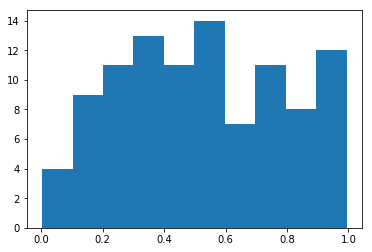

In [14]:
plt.hist(pvalues)

In [15]:
scipy.stats.kstest(pvalues, 'uniform')

KstestResult(statistic=0.08976023976023975, pvalue=0.3762679117766053)

In [16]:
sum(i <= 0.05 for i in pvalues)

1